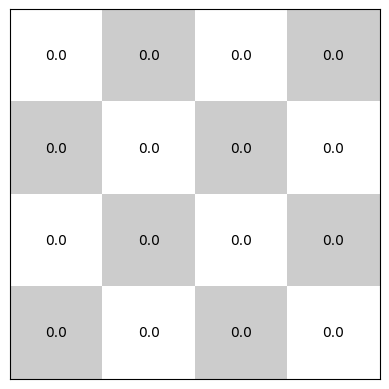

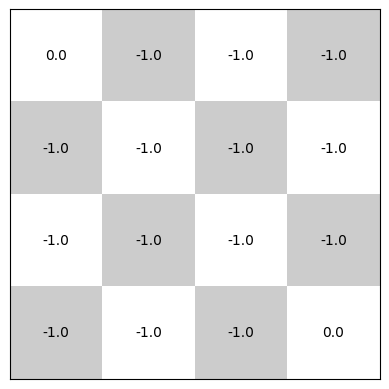

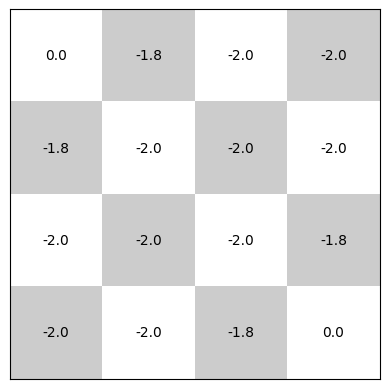

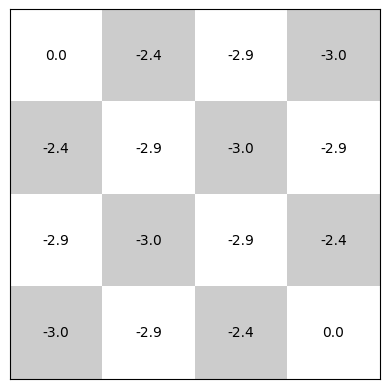

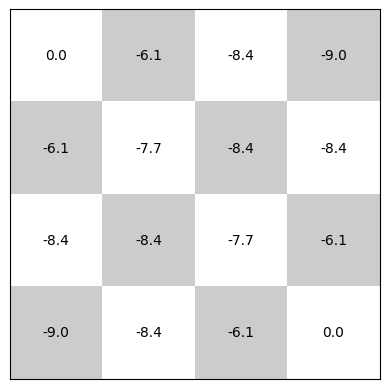

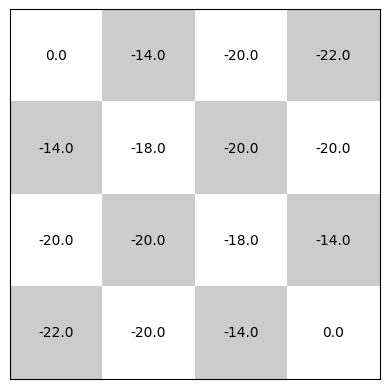

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import profile

grid_size = 4
num_actions = 4 # up down right left
num_states = grid_size * grid_size
action_state_transition = np.zeros((num_states,  num_actions),dtype=int)
for y in range(grid_size):
    for x in range(grid_size):
        if y == 0:
            up =  y * grid_size + x
        else:
            up = (y-1) * grid_size + x
        if y == grid_size - 1:
            down =  y * grid_size + x
        else:
            down = (y+1) * grid_size + x
        if x == 0: 
            left =  y * grid_size + x
        else: 
            left = y * grid_size + x - 1
        if x == grid_size - 1:
            right =  y * grid_size + x
        else:
            right = y * grid_size + x + 1
        action_state_transition[y * grid_size + x] = [up, down, left, right]
action_state_transition[0] = 0
action_state_transition[num_states-1] = num_states-1

def value_to_policy(values):
    policy = np.zeros((num_states, num_actions), dtype = bool)
    for s in range(1, num_states - 1):
        for a in range(num_actions):
            s_prime = action_state_transition[s, a]
            if values[s_prime] > values[s]:
                policy[s, a] = True
    return policy

def evaluate_policy(policy, gamma, epochs):
    values = np.zeros(num_states)
    new_values = np.zeros(num_states)
    for _ in range(epochs):
        #delta = 0.0
        for s in range(1, num_states - 1):
            v_new = 0.0
            for a in policy[s]:
                v_prime = values[action_state_transition[s,a]]
                v_new += (-1 + gamma*v_prime)
            v_new /= float(len(policy[s]))
            #delta = max(delta, abs(v_new - values[s]))
            new_values[s] = v_new
        values = new_values.copy()
    return values

def improve_policy(policy, gamma, epochs):
    stable = False
    values = evaluate_policy(policy, gamma, epochs)
    new_policy = np.full()
    for s in range(1,grid_size * grid_size-1):
        q_pi = np.full(num_actions, float("-inf"))
        for i in range(num_actions):
            if policy[s][i]:
                q_pi[i] = values[action_state_transition[s,i]]

            s_prime = action_state_transition[s,a]
        
def test(epochs):
    values = evaluate_policy(1, epochs)
    show_values = values.reshape(grid_size, grid_size)

    plt.xticks([])
    plt.yticks([])
    board = np.ones((grid_size, grid_size, 3))
    board[1::2, ::2] = 0.8
    board[::2, 1::2] = 0.8
    im = ax.imshow(board,cmap="binary")
    for i in range(grid_size):
        for j in range(grid_size):
            text = ax.text(j, i, f"{show_values[i, j]:.1f}",
                        ha="center", va="center", color=(0,0,0))

epochs = [0,1,2,3,10,200]
fig, ax = plt.subplots(len(epochs))
for n in :
    test(n)